Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-02 05:38:58--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-02 05:38:58--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d3ca64b762e18dbd90b08f27d.dl.dropboxusercontent.com/cd/0/inline/Bc8H_wjl0EHantmX1xBm7OGTU9mKAXx6kA86My9dmNkS03q-qpu8D8DZpImIZw-GZgSCqS_DOo6dxlpB_rVb-QlEfGYMvtzIqRUx9VrfCsQxWTJkZLc8StCYW2_yQGnnvUoCJXCLeyTUNVbnBeumqgbz/file# [following]
--2022-01-02 05:38:59--  https://uc4d3ca64b762e18dbd90b08f27d.dl.dropboxusercontent.com/cd/0/inline/Bc8H_wjl0EHantmX1xBm7OGTU9mKAXx6kA86My9dmNkS03q-qpu8D8DZpImIZw-GZg

In [2]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [3]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [4]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [5]:
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones

In [6]:
dftemp

,date,freq
0,2015-01-01 00:13:00,1
1,2015-01-01 00:16:00,1
2,2015-01-01 00:48:00,1
3,2015-01-01 00:56:00,1
4,2015-01-01 01:04:00,1
...,...,...
24085,2017-12-31 17:14:00,1
24086,2017-12-31 18:40:00,1
24087,2017-12-31 20:09:00,1
24088,2017-12-31 20:44:00,1


In [7]:
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
#dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
#dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()

The Model

In [8]:
!pip install prophet

     |████████████████████████████████| 65 kB 1.5 MB/s 
     |████████████████████████████████| 49 kB 2.8 MB/s 
     |████████████████████████████████| 43 kB 914 kB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641166 sha256=4f09679a204fe697c4003cd04fa68fa5f231269ea082ae29337b799ae3fc2506
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [9]:
!pip install dask

In [10]:
# Python
import pandas as pd
from prophet import Prophet

In [11]:
!git clone https://github.com/facebook/prophet.git

Cloning into 'prophet'...
remote: Enumerating objects: 5186, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 5186 (delta 213), reused 393 (delta 168), pack-reused 4704
Receiving objects: 100% (5186/5186), 53.78 MiB | 28.43 MiB/s, done.
Resolving deltas: 100% (3270/3270), done.


In [12]:
# Python
dftempday = dftempday.reset_index()
df = dftempday.rename(columns = {'date': 'ds', 'freq': 'y'}, inplace = False)
df.head()

,ds,y
0,2015-01-01,34
1,2015-01-02,25
2,2015-01-03,24
3,2015-01-04,34
4,2015-01-05,28


In [13]:
# Python
m = Prophet()
m.fit(df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1456,2018-12-27
1457,2018-12-28
1458,2018-12-29
1459,2018-12-30
1460,2018-12-31


In [15]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1456,2018-12-27,12.433297,1.137268,23.709052
1457,2018-12-28,12.993481,2.208527,23.959235
1458,2018-12-29,15.001293,4.124805,25.555617
1459,2018-12-30,15.625313,4.567699,27.309847
1460,2018-12-31,12.988244,1.454802,23.344090


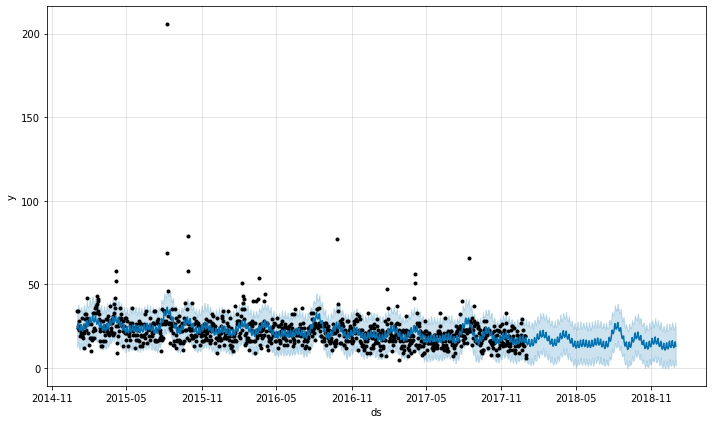

In [17]:
# Python
fig1 = m.plot(forecast, uncertainty=True)


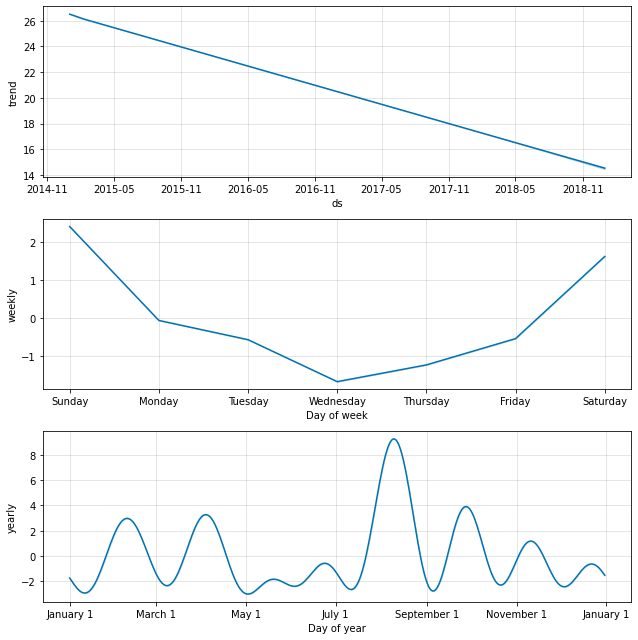

In [18]:
# Python
fig2 = m.plot_components(forecast)


Cross-Validation

In [19]:
# Python
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 1 forecasts with cutoffs between 2016-12-31 00:00:00 and 2016-12-31 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-01-01,22.036311,9.546766,34.088323,29,2016-12-31
1,2017-01-02,19.050583,7.476780,31.185700,25,2016-12-31
2,2017-01-03,18.430409,6.128373,30.074742,20,2016-12-31
3,2017-01-04,17.218917,5.951549,28.910205,15,2016-12-31
4,2017-01-05,17.784019,5.708723,29.816999,23,2016-12-31


In [21]:
# Python
cutoffs = pd.to_datetime(['2016-02-15', '2016-08-15', '2017-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='180 days')
df_cv2.head()

  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-02-16,29.233584,15.095885,43.383223,21,2016-02-15
1,2016-02-17,28.253138,14.438031,41.332374,15,2016-02-15
2,2016-02-18,28.375564,15.072728,42.736078,25,2016-02-15
3,2016-02-19,28.600297,14.934956,43.434262,18,2016-02-15
4,2016-02-20,30.990538,18.217021,44.975382,17,2016-02-15


In [22]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,49.320511,7.022856,5.105483,0.281632,0.215354,0.256174,0.944444
1,37 days,48.613108,6.972310,5.045342,0.281977,0.215354,0.254822,0.944444
2,38 days,49.205924,7.014693,5.089313,0.288443,0.215354,0.257904,0.944444
3,39 days,53.571791,7.319275,5.396676,0.321360,0.227083,0.277144,0.916667
4,40 days,54.596765,7.388962,5.514680,0.327818,0.238865,0.282196,0.916667


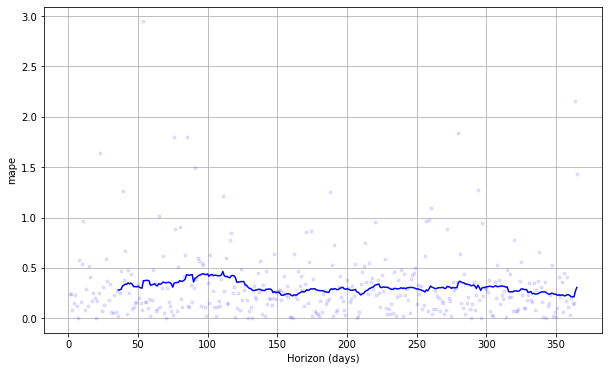

In [23]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
